In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

grouped_ride_df = ride_df.groupby(['city'])
avg_fare = grouped_ride_df['fare'].mean()
ride_count = grouped_ride_df['ride_id'].count()

ride_transformed_df = pd.DataFrame({'Average Fare': avg_fare,
                                    'Ride Count':ride_count})
ride_transformed_df.head()

# Combine the data into a single dataset
combined_data_df = pd.merge(city_df, ride_transformed_df, on="city" )

# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,Average Fare,Ride Count
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31


## Bubble Plot of Ride Sharing Data

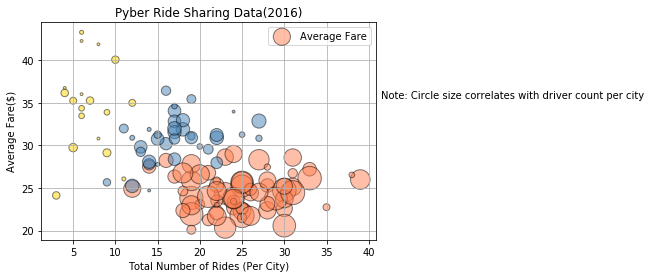

In [64]:
# Obtain the x and y coordinates for each of the three city types
x_axis = combined_data_df['Ride Count']
data = combined_data_df['Average Fare']
area = combined_data_df['driver_count']*8

conditions = [
    (combined_data_df['type'] == 'Urban'),
    (combined_data_df['type'] == 'Suburban'),
    (combined_data_df['type'] == 'Rural')]

choices = ['coral', 'steelblue', 'gold']

combined_data_df['color'] = np.select(conditions, choices)

city_color = combined_data_df['color']

# Build the scatter plots for each city types
plt.scatter(x_axis, data, s=area, c=city_color, alpha=0.5, 
            edgecolors='black')
# Incorporate the other graph properties
plt.grid()

# Create a legend
plt.legend(loc='best')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel('Average Fare($)')
plt.title('Pyber Ride Sharing Data(2016)')
plt.annotate('Note: Circle size correlates with driver count per city', (0,0), (340, 150), xycoords='axes fraction', textcoords='offset points', va='top')
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Pyber Homework 1.png")

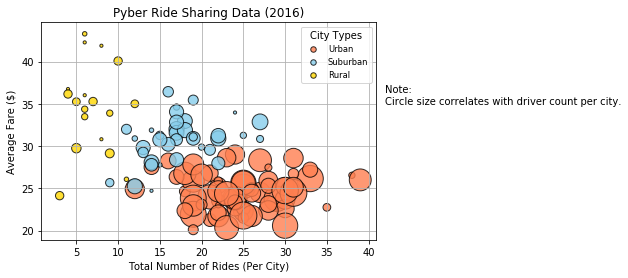

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [137]:
total_drivers = city_df['driver_count'].sum()
total_drivers

2973

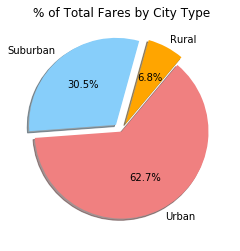

In [152]:
# Calculate Type Percents

combined_data2_df = pd.merge(city_df, ride_df, on="city" )
grouped_data2_df = combined_data2_df.groupby(['type'])
grouped_city_df = city_df.groupby(['type'])
fare_by_type = grouped_data2_df['fare'].sum()
rides_by_type = grouped_data2_df['ride_id'].count()
drivers_by_type = grouped_city_df['driver_count'].sum()
total_fare = ride_df['fare'].sum()
total_rides = ride_df['ride_id'].count()
total_drivers = city_df['driver_count'].sum()

pie1_df=pd.DataFrame({'fare':fare_by_type,
                      'total_fare':total_fare,
                      'rides':rides_by_type,
                      'total_rides':total_rides,
                      'drivers':drivers_by_type,
                      'total drivers':total_drivers}
                     )
pie1_df.head()
pie1_df['% of Total Fares'] = pie1_df['fare']/pie1_df['total_fare']

# Build Pie Chart
labels = pie1_df.index
sizes = pie1_df['% of Total Fares']
colors = ['orange', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors = colors,autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("Pyber Homework 2.png")

## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

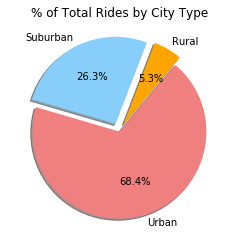

In [155]:
# Calculate Ride Percents

pie1_df['% of Total Rides'] = pie1_df['rides']/pie1_df['total_rides']

# Build Pie Chart
labels = pie1_df.index
sizes = pie1_df['% of Total Rides']
colors = ['orange', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors = colors,autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("Pyber Homework 3.png")

## Total Drivers by City Type

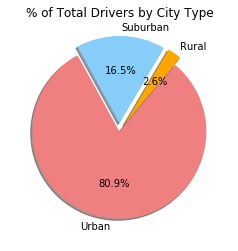

In [159]:
# Calculate Driver Percents
pie1_df['% of Total Drivers'] = pie1_df['drivers']/pie1_df['total drivers']

# Build Pie Chart
labels = pie1_df.index
sizes = pie1_df['% of Total Drivers']
colors = ['orange', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors = colors,autopct="%1.1f%%", shadow=True, startangle=50)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("Pyber Homework 4.png")

